# BRCA1 Phylogeny Tree

**Rationale** mutation in BRCA1 gene play an important role during tumorigenesis.

In [9]:
# The BRCA1 protein sequences are downlooaded from orthoDB, link:
# http://www.orthodb.org/fasta?query=EOG090B00J7&level=&species=&universal=&singlecopy=

In [48]:
# The downloaded fasta file looks like this:
! head -2 data/brca.fasta

>10020:000f5c {"pub_gene_id":"ENSDORG00000004235", "pub_og_id":"EOG090B00J7", "level":7742, "description":"breast cancer 1 "}
SLQESTRFSQLVEELLRIIHAFELDTGLQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXKKFRQNESQNSTQVSLSVQLSKLGIVSSLKTKKQIQPQNKSVYIELGSDSSEETSYISNYCPKVQTNSRYDSDSSDKTNTPFTNCSNKEESVGPSLEREIEENLETIEVPNLTKDPRDRLVNGERAMPTELSADSTSLSWTPDSEYDTQDSISLLEINPLRRGKTASNQCEIQYEAVGNPNHIIHDCSKTTRHDTEGFMDPLRQEDSHMLESDIETEESELDTQYLQNTFQDSKRQSFALFSNSGNPEKECATVSAHSISLSKQSPNVILEYKQRENHQDKESKTRLAQAIKATTDFPVICQKHEPGDNAECSSSIAKTSGLCPSSQLTANELTSANKLRILQNSYLIPSISPVRPSVKTKCKQMFEKQSMSSEEGLESESIIQSTLCMFSPNNIENAFKGASPGSINEVGSSTTGGGSSINEVASSVENIQEELNRSRGPELNAVLRLGHTQPEAYNQTLPVSNCKHPEIKEQTENEGVVQVVGADFSPCLISDTLETGMTSNDVSQICPETPEDLLYNDEIKENTSFTEGAIEETSAVFSKSIQKREFSQSPSPSLTSTSLAQGLKDDDLPSFRHFLFSKVTNTPFQSIRHTIKCLSHETEENPVSLRNSLQVNNNEILVEASQEXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSGLVSDDEEREPDLEEEERTDSNLGEAASGYDSETNLSENISEVSSQNDFLTSQQKHIMKDNLKKIQQEMAHLEAVLQQHKSQQLPASSTSLLANYCGPEQNVSGKXXXXXXXXXXXXXXXXXXXXXX

In [49]:
# The taxo ID here is: '10036:003dfe', it will cause issue for NCBI taxo annotation
# so I get rid of the ':003dfe' part
import re

with open('data/brca.fasta', 'r+') as f:
    data = f.read()
    data = re.sub(':\w{6}', '', data)
    f.close()
    
with open('data/brca_modified.fasta', 'w') as fwrite:
    fwrite.write(data)
    fwrite.close()

In [51]:
# check if the modified fasta file has the right format
# there are few proteins were unknown proteins in the db, they were deleted manually, however, this cannot be scaled
! head -2 data/brca_modified.fasta

>10020 {"pub_gene_id":"ENSDORG00000004235", "pub_og_id":"EOG090B00J7", "level":7742, "description":"breast cancer 1 "}
SLQESTRFSQLVEELLRIIHAFELDTGLQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXKKFRQNESQNSTQVSLSVQLSKLGIVSSLKTKKQIQPQNKSVYIELGSDSSEETSYISNYCPKVQTNSRYDSDSSDKTNTPFTNCSNKEESVGPSLEREIEENLETIEVPNLTKDPRDRLVNGERAMPTELSADSTSLSWTPDSEYDTQDSISLLEINPLRRGKTASNQCEIQYEAVGNPNHIIHDCSKTTRHDTEGFMDPLRQEDSHMLESDIETEESELDTQYLQNTFQDSKRQSFALFSNSGNPEKECATVSAHSISLSKQSPNVILEYKQRENHQDKESKTRLAQAIKATTDFPVICQKHEPGDNAECSSSIAKTSGLCPSSQLTANELTSANKLRILQNSYLIPSISPVRPSVKTKCKQMFEKQSMSSEEGLESESIIQSTLCMFSPNNIENAFKGASPGSINEVGSSTTGGGSSINEVASSVENIQEELNRSRGPELNAVLRLGHTQPEAYNQTLPVSNCKHPEIKEQTENEGVVQVVGADFSPCLISDTLETGMTSNDVSQICPETPEDLLYNDEIKENTSFTEGAIEETSAVFSKSIQKREFSQSPSPSLTSTSLAQGLKDDDLPSFRHFLFSKVTNTPFQSIRHTIKCLSHETEENPVSLRNSLQVNNNEILVEASQEXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSGLVSDDEEREPDLEEEERTDSNLGEAASGYDSETNLSENISEVSSQNDFLTSQQKHIMKDNLKKIQQEMAHLEAVLQQHKSQQLPASSTSLLANYCGPEQNVSGKXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [59]:
# the goal here is to build a standard fasttree
# -a indicates we are using a.a. sequences
# -o refers to the output folder

! ete3 build -w standard_fasttree -a data/brca_modified.fasta -o brca_tree/ --clearall

Toolchain path: /Users/csyk2/anaconda3/envs/py27/bin/ete3_apps 
Toolchain version: 2.0.3


      --------------------------------------------------------------------------------
                  ETE build (3.0.0b36) - reproducible phylogenetic workflows 

      Citation: 

       Huerta-Cepas J, Serra F and Bork P. ETE 3: Reconstruction, analysis and
       visualization of phylogenomic data. Mol Biol Evol (2016)
       doi:10.1093/molbev/msw046

      (Note that a list of the external programs used to complete all necessary
      computations will be shown after workflow execution. Those programs should
      also be cited.)

      --------------------------------------------------------------------------------
      
INFO -  Testing x86-64  portable applications...
       clustalo: OK - 1.2.1
Dialign-tx not supported in OS X
       fasttree: OK - Usage for FastTree version 2.1.8 Double precision (No SSE3), OpenMP (1 threads):
         kalign: OK - Kalign version 2.04, Copyright (C) 

In [60]:
# Use tree to check the files in the output folder
# I prefer 'tree' over 'ls' because it gives a more comprehensive view of a folder with sub-folders

! tree brca_tree/

brca_tree/
├── clustalo_default-none-none-fasttree_full
│   ├── brca_modified.fasta.final_tree.fa
│   ├── brca_modified.fasta.final_tree.nw
│   ├── brca_modified.fasta.final_tree.nwx
│   ├── brca_modified.fasta.final_tree.png
│   ├── brca_modified.fasta.final_tree.png.pdf
│   ├── brca_modified.fasta.final_tree.png.svg
│   ├── brca_modified.fasta.final_tree.used_alg.fa
│   ├── command_lines
│   ├── commands.log
│   └── runid
├── db
│   ├── 0078d8b72432a98c90881bddba4170ed.pkl
│   ├── 1c3d5cba65e3172aeecab5a0dce7a501.pkl
│   ├── 1f2f6d9a2518f8047dee3772ac4e38f9.pkl
│   ├── 3c97efafcc36415cbc11950f2b33c882.pkl
│   ├── 6262f7c55e4e61c55683d20ace4e417a.pkl
│   ├── 990e44f7e85b29221eccc373981f5e54.pkl
│   ├── 99914b932bd37a50b983c5e7c90ae93b.pkl
│   ├── ba6ba7bb6ba9d5999f90fefbccc2a006.pkl
│   ├── data.db
│   ├── npr.db
│   └── seq.db
├── ete_build.cfg
└── tasks
    ├── 56a05e9a70bd51845061cadb0c66019f
    │   ├── __cmd__
    │   ├── __status__
    │   ├── __stderr__
    │   ├── __stdout__
 

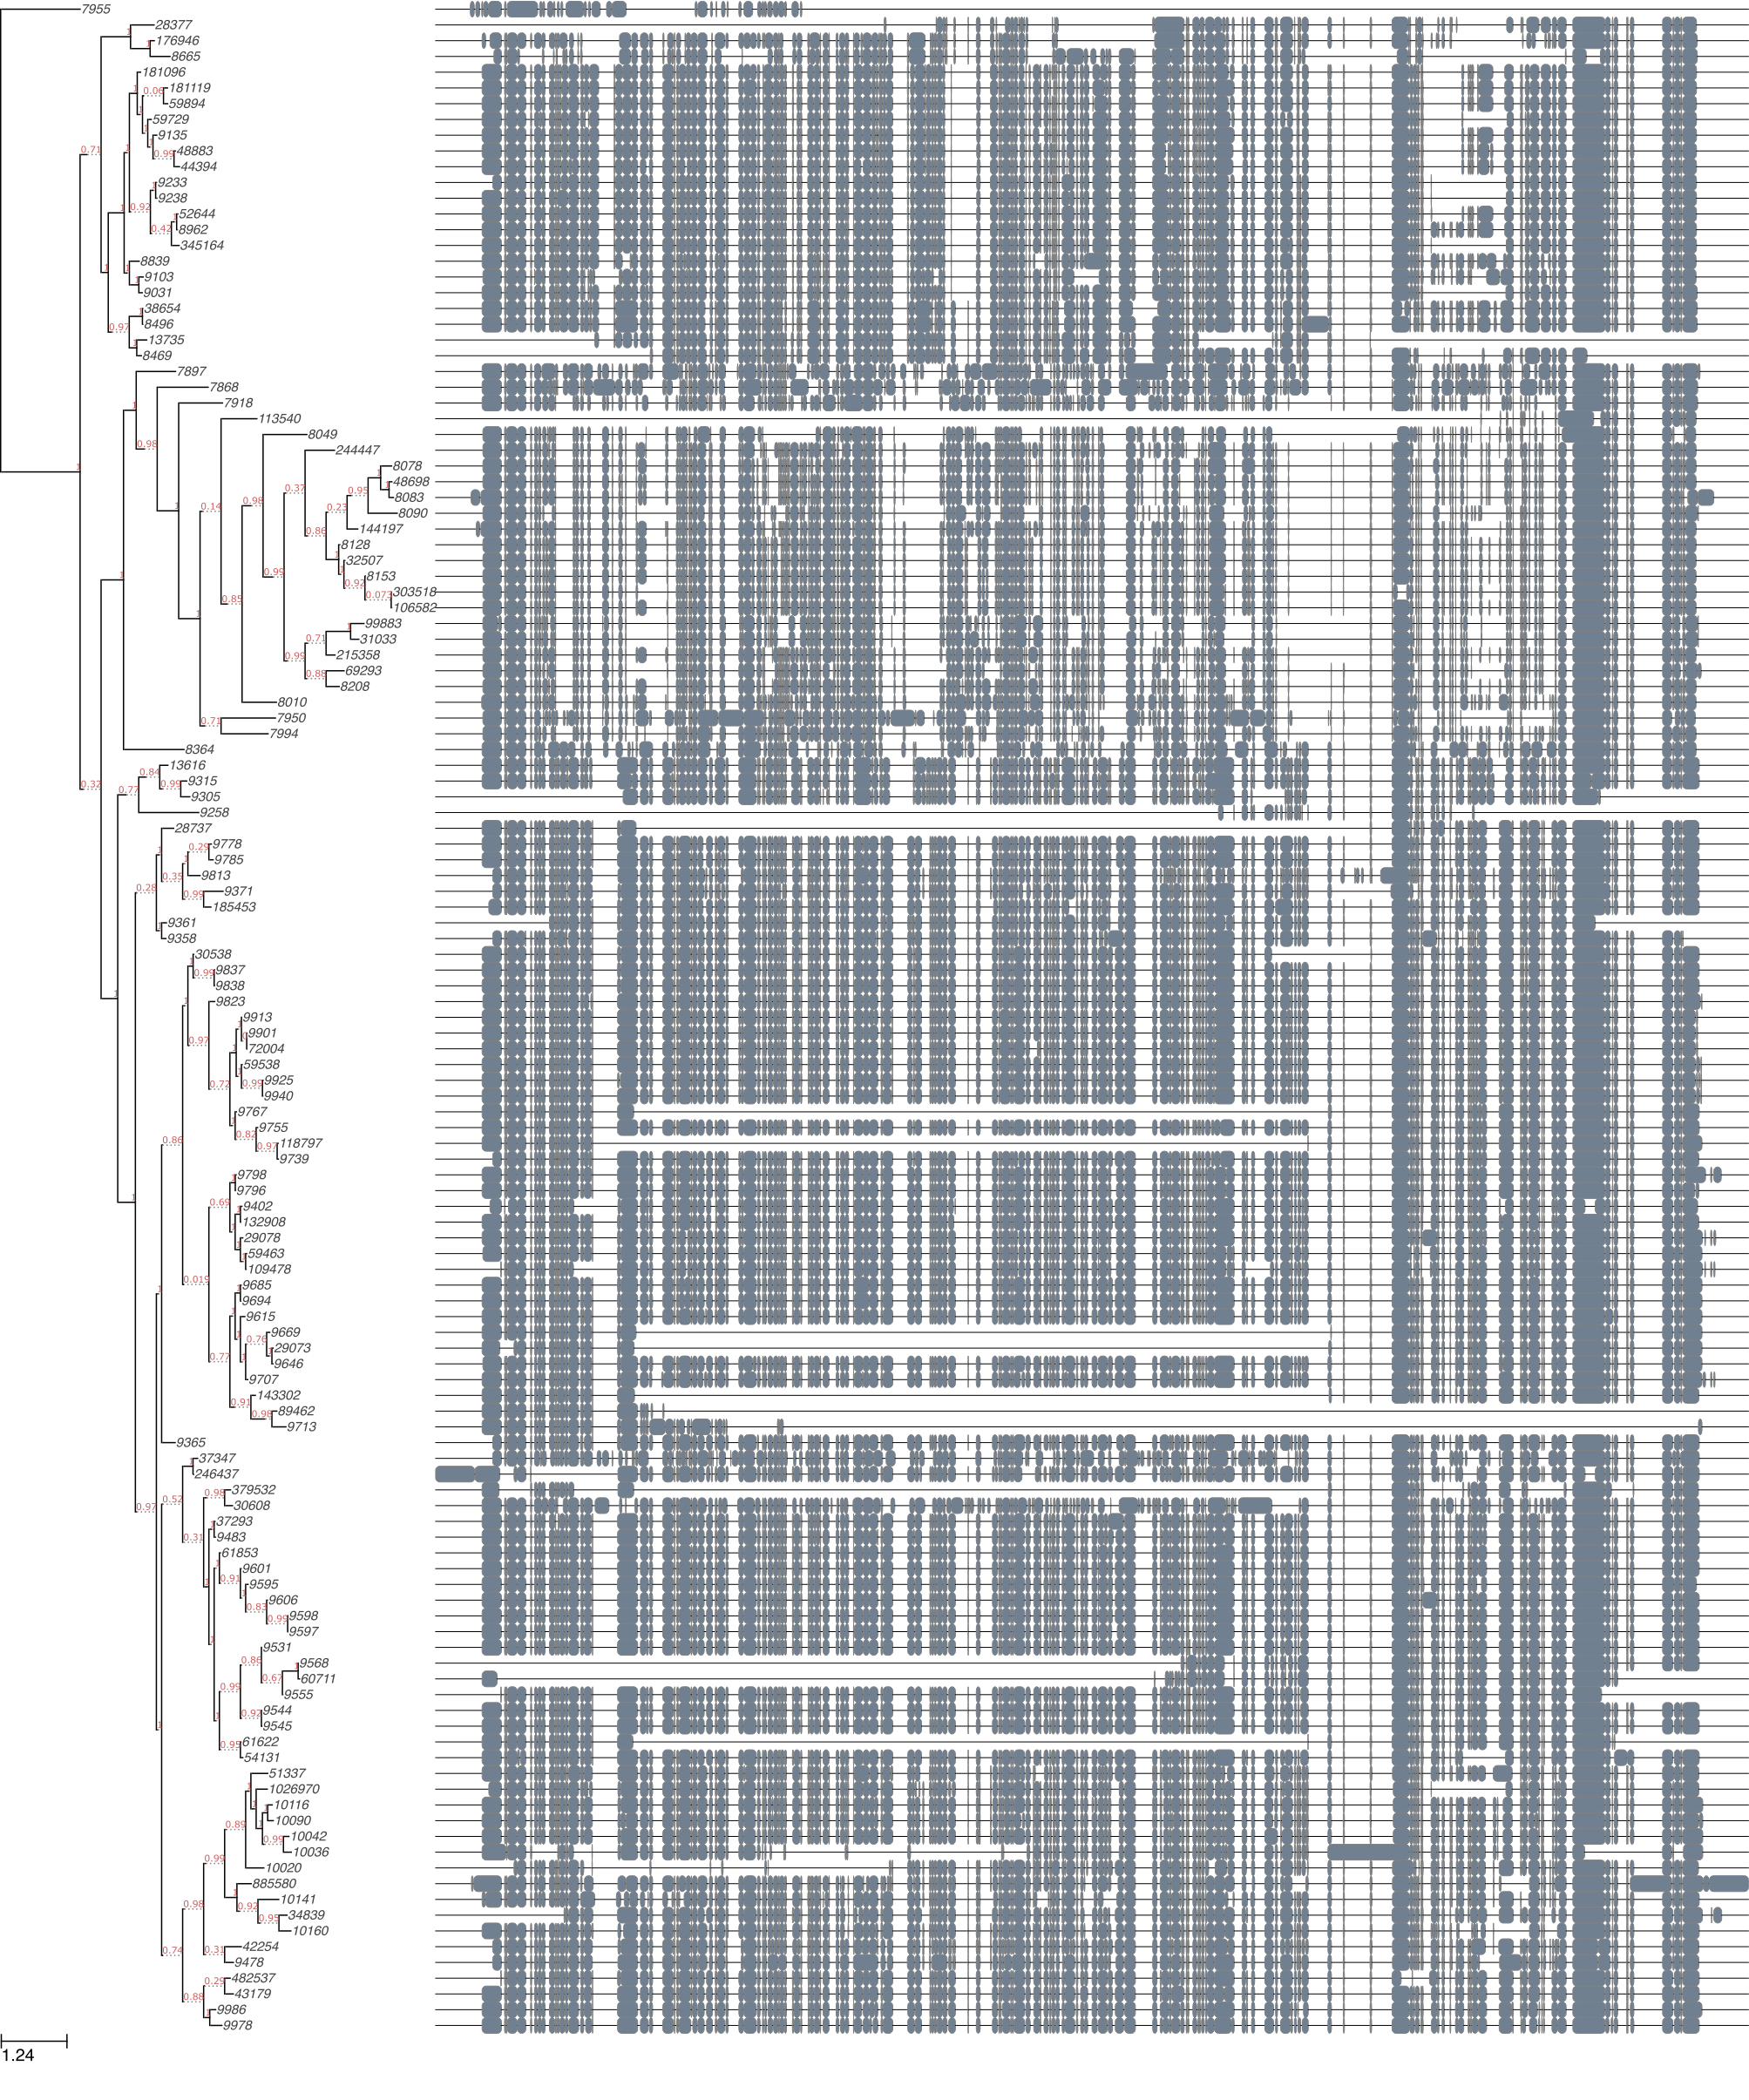

In [62]:
# One clear issue is that the fasta file uses organism ID rather than the organism name,\
# thus, it is hard to 'read' this tree.from IPython.display import Image
from IPython.display import Image
Image(filename='brca_tree/clustalo_default-none-none-fasttree_full/brca_modified.fasta.final_tree.png')

In [64]:
# copy the .nw file to the main folder for annotations

! cp brca_tree/clustalo_default-none-none-fasttree_full/brca_modified.fasta.final_tree.nw brcatree.nw

In [67]:
# To solve the issue of taxonomy, we use the annotation '--ncbi' and output it into a image:
# brca_tree.png

%%bash
ete3 annotate --ncbi -t brcatree.nw | ete3 view --ncbi --image  brca_tree.png --Iw 1500

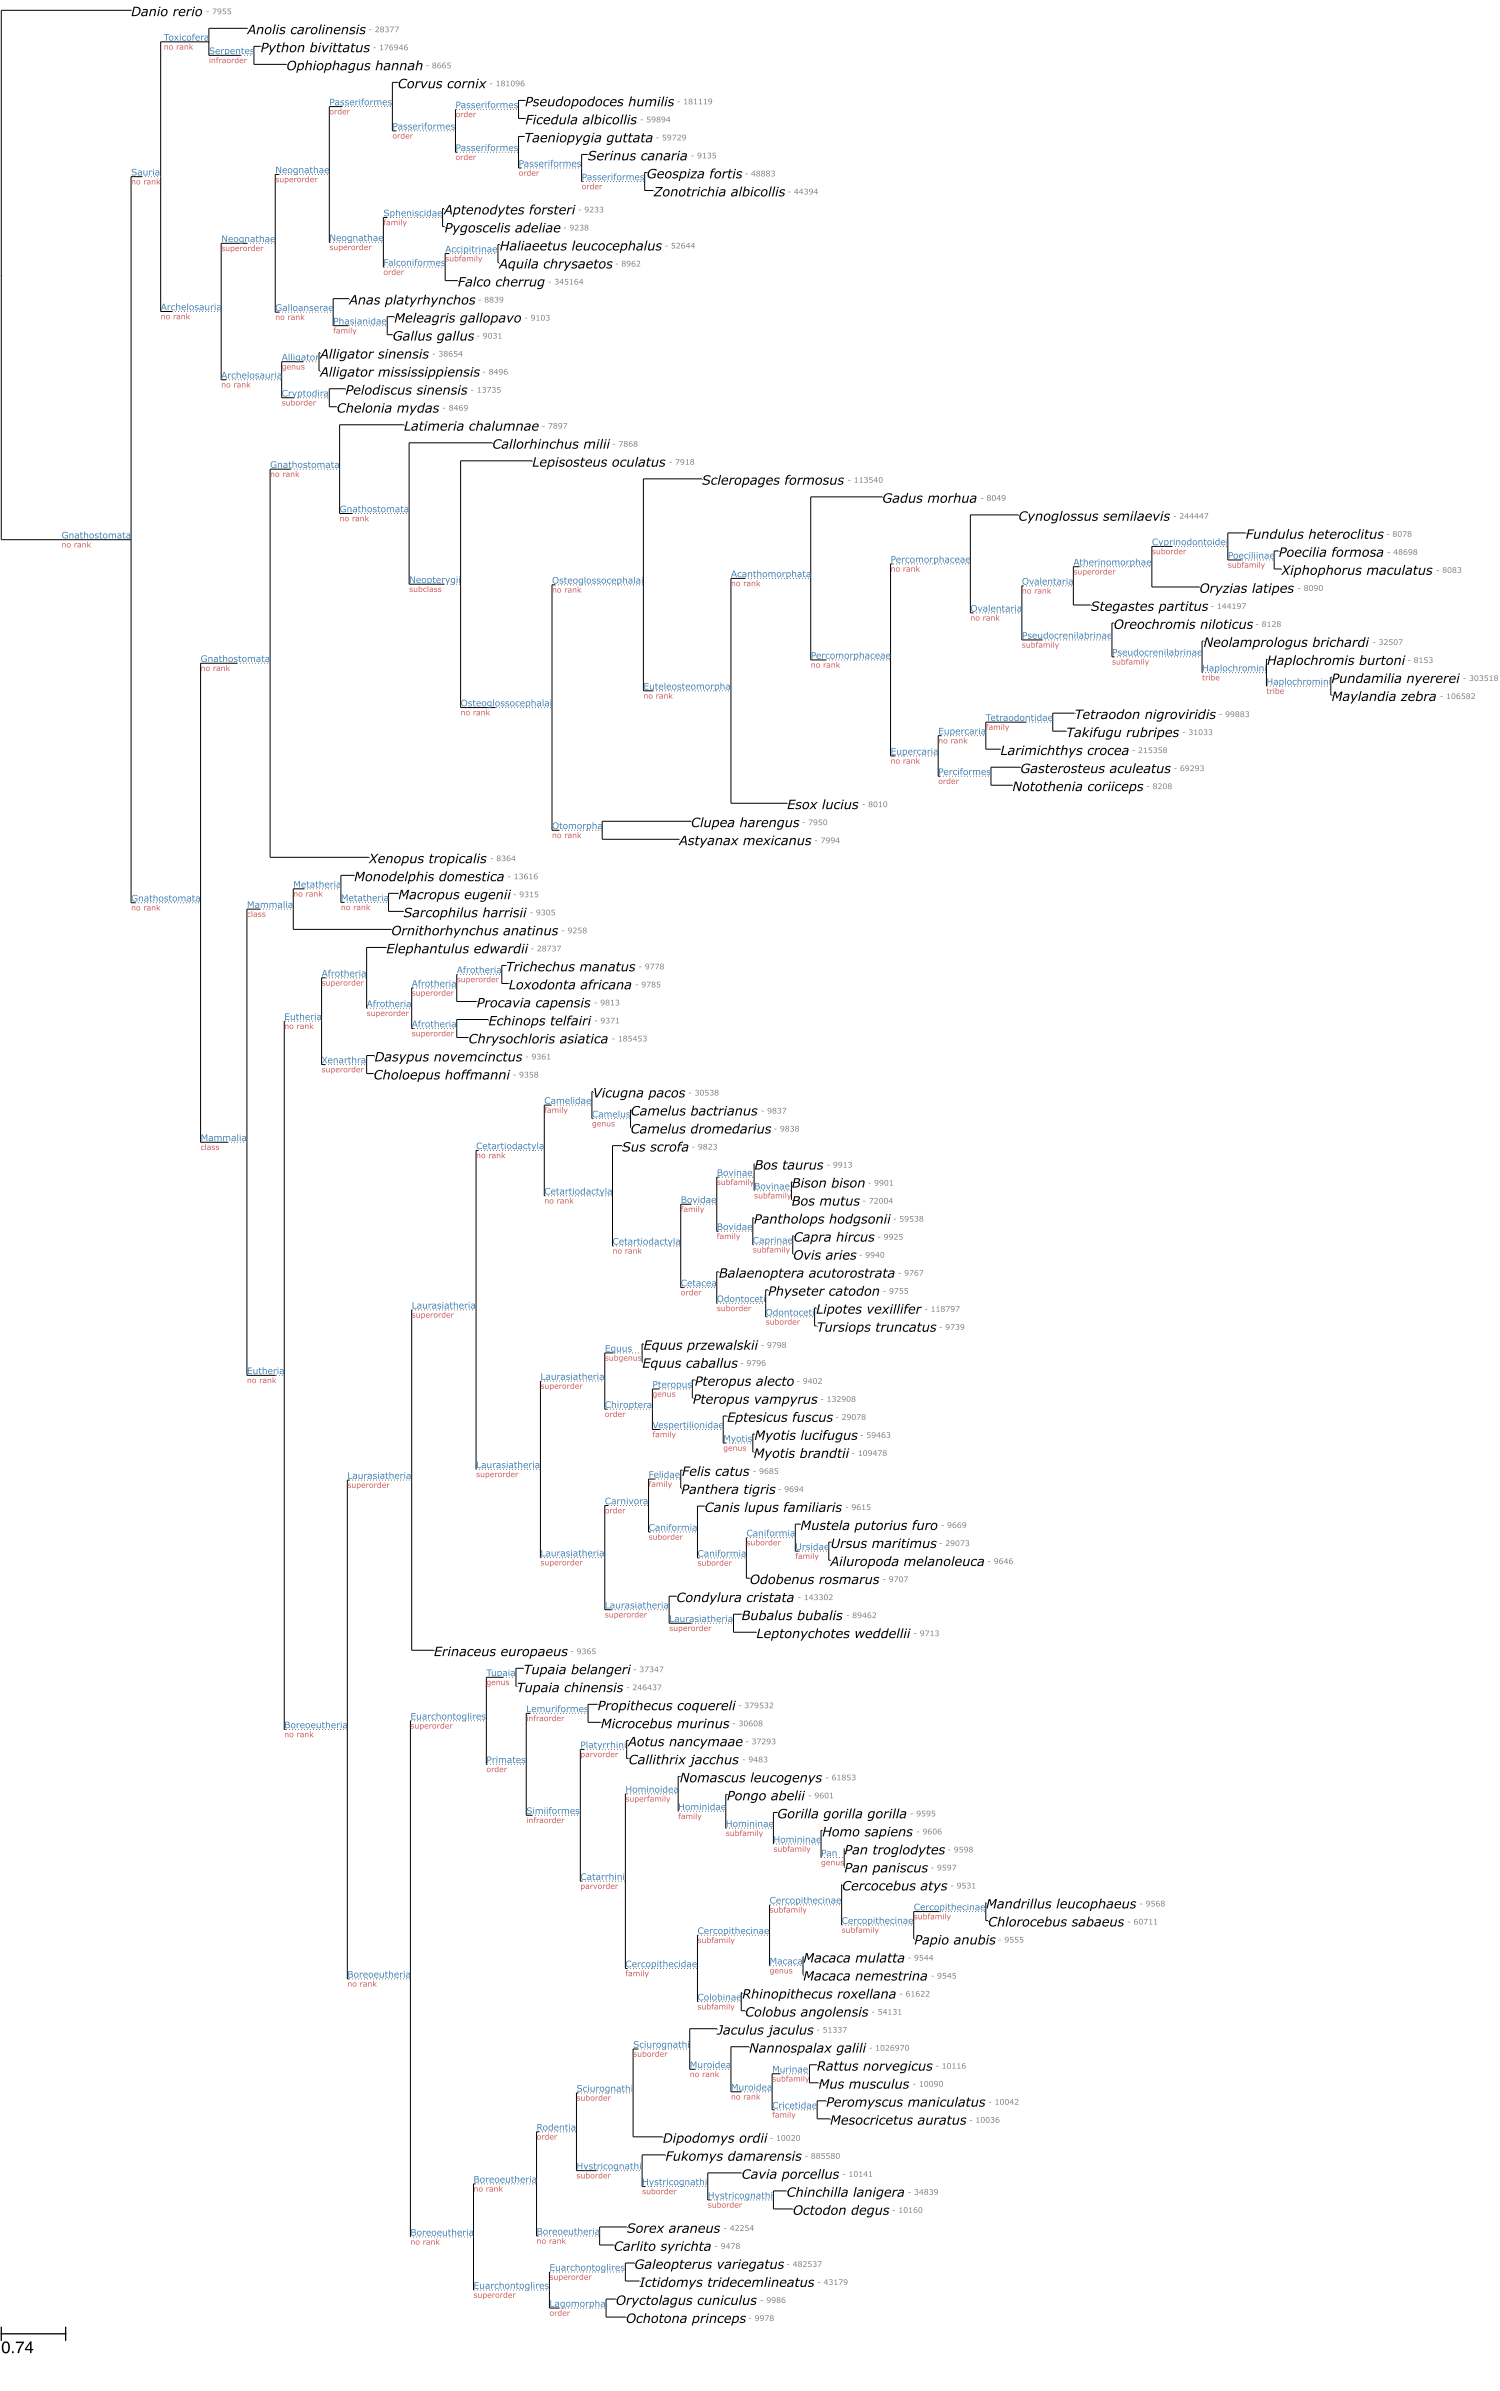

In [68]:
Image('brca_tree.png')

In [ ]:
! ete3 build -w full_ultrafast_modeltest_bootstrap -a data/brca_modified.fasta -o brca_tree_bootstrap/ --clearall

Toolchain path: /Users/csyk2/anaconda3/envs/py27/bin/ete3_apps 
Toolchain version: 2.0.3


      --------------------------------------------------------------------------------
                  ETE build (3.0.0b36) - reproducible phylogenetic workflows 

      Citation: 

       Huerta-Cepas J, Serra F and Bork P. ETE 3: Reconstruction, analysis and
       visualization of phylogenomic data. Mol Biol Evol (2016)
       doi:10.1093/molbev/msw046

      (Note that a list of the external programs used to complete all necessary
      computations will be shown after workflow execution. Those programs should
      also be cited.)

      --------------------------------------------------------------------------------
      
INFO -  Testing x86-64  portable applications...
       clustalo: OK - 1.2.1
Dialign-tx not supported in OS X
       fasttree: OK - Usage for FastTree version 2.1.8 Double precision (No SSE3), OpenMP (1 threads):
         kalign: OK - Kalign version 2.04, Copyright (C) 

In [77]:
# Reference workflows

! ete3 build workflows genetree


-------------------------------------------------------------------------------------------------------------------------
                                                    GeneTree Workflows                                                   
-------------------------------------------------------------------------------------------------------------------------
Worflow name                                  | Description                                                  | threads   
============================================= | ============================================================ | ==========
phylomedb4                                    | Worflow described in Huerta-Cepas, et al (Nucleic Acid Resea | 1         
                                              | rch, 2013) and used in http://PhylomeDB.org                  |           
--------------------------------------------- | ------------------------------------------------------------ | ----------
eggnog41               

In [ ]:
, 